In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as pl

import scipy.io

In [3]:
tensor_arr_a = scipy.io.loadmat('test_glrsp_01.mat')
arr_a = tensor_arr_a['tensor_iht_arr']
m = list(tensor_arr_a['m_vector'][0])
mediana = np.median(arr_a, 1)
p25a = np.percentile(arr_a, 25, 1)
p75a = np.percentile(arr_a, 75, 1)

tensor_arr_b = scipy.io.loadmat('test_rauhut_01.mat')
arr_b = tensor_arr_b['tensor_iht_arr']
medianb = np.median(arr_b, 1)
p25b = np.percentile(arr_b, 25, 1)
p75b = np.percentile(arr_b, 75, 1)

tensor_arr_c = scipy.io.loadmat('test_cp_01.mat')
arr_c = tensor_arr_c['tensor_iht_arr']
medianc = np.median(arr_c, 1)
p25c = np.percentile(arr_c, 25, 1)
p75c = np.percentile(arr_c, 75, 1)


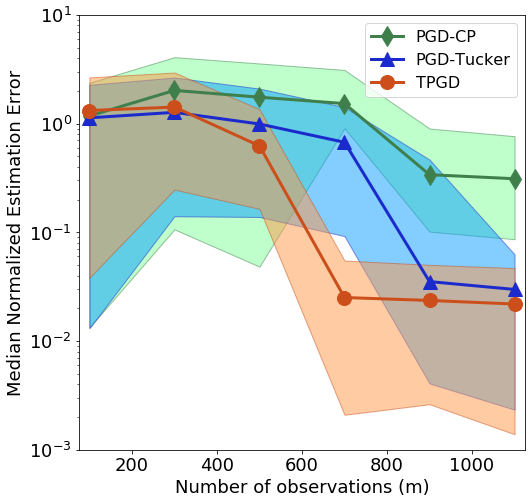

In [6]:
pl.figure(figsize=(8,8))

pl.plot(m, medianc, 'k-d', color='#3F7F4C', markersize=14, linewidth=3, label = 'PGD-CP')
pl.fill_between(m, np.array(medianc-p25c), np.array(medianc+p75c), alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99', antialiased=True)

pl.plot(m, medianb, 'k-^', color='#1B2ACC', markersize=14, linewidth=3, label = 'PGD-Tucker')
pl.fill_between(m, medianb-p25b, medianb+p75b, alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF', antialiased=True)

pl.plot(m, mediana, 'k-o', color='#CC4F1B', markersize=14, linewidth=3, label = 'TPGD')
ax1 = pl.gca()
pl.fill_between(m, mediana-p25a, mediana+p75a, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848', antialiased=True)

pl.xlabel('Number of observations (m)', fontsize= 18, fontname = 'Time New Romans')
pl.ylabel('Median Normalized Estimation Error', fontsize= 18, fontname = 'Time New Romans')
#pl.legend( )

pl.legend(loc=1, prop={'size': 16})

ax = pl.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)

pl.yscale('log')
pl.axis([75, 1125, 1e-3, 10])
pl.savefig('err_01.png', dpi = 300)
pl.show()